# Download MIMIOC Mixed-Layer Depths

We'll download [MIMOC](https://www.pmel.noaa.gov/mimoc/) data here.

In [1]:
# parameters
mimoc_url = "https://www.pmel.noaa.gov/mimoc/data/MIMOC_ML_v2.2_PT_S.zip -o mimoc/MIMOC_ML_v2.2_PT_S.zip"
mimoc_mld_file = "tmp_mimoc_mld.nc"

## Download and extract data

In [2]:
!rm -rfv mimoc/
!mkdir -p mimoc
!curl {mimoc_url}
!cd mimoc && unzip MIMOC_ML_v2.2_PT_S.zip

removed 'mimoc/MIMOC_ML_v2.2_PT_S_MLP_month01.nc'
removed 'mimoc/MIMOC_ML_v2.2_PT_S_MLP_month11.nc'
removed 'mimoc/MIMOC_ML_v2.2_PT_S_MLP_month05.nc'
removed 'mimoc/MIMOC_ML_v2.2_PT_S_MLP_month04.nc'
removed 'mimoc/MIMOC_ML_v2.2_PT_S_MLP_month10.nc'
removed 'mimoc/MIMOC_ML_v2.2_PT_S_MLP_month07.nc'
removed 'mimoc/MIMOC_ML_v2.2_PT_S_MLP_month03.nc'
removed 'mimoc/MIMOC_ML_v2.2_PT_S_MLP_month02.nc'
removed 'mimoc/MIMOC_ML_v2.2_PT_S_MLP_month12.nc'
removed 'mimoc/MIMOC_ML_v2.2_PT_S_MLP_month06.nc'
removed 'mimoc/MIMOC_ML_v2.2_PT_S_MLP_month09.nc'
removed 'mimoc/MIMOC_ML_v2.2_PT_S.zip'
removed 'mimoc/MIMOC_ML_v2.2_PT_S_MLP_month08.nc'
removed directory 'mimoc/'
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20.0M  100 20.0M    0     0  1447k      0  0:00:14  0:00:14 --:--:-- 3129k
Archive:  MIMOC_ML_v2.2_PT_S.zip
  inflating: MIMOC_ML_v2.2_PT_S_MLP_month01.nc  
  inflating: MI

## Extract mixed layer depth and fix labels

In [3]:
import xarray as xr
import numpy as np
from pathlib import Path

In [4]:
mimoc_files = sorted(Path("mimoc").glob("*.nc"))
mimoc_files

[PosixPath('mimoc/MIMOC_ML_v2.2_PT_S_MLP_month01.nc'),
 PosixPath('mimoc/MIMOC_ML_v2.2_PT_S_MLP_month02.nc'),
 PosixPath('mimoc/MIMOC_ML_v2.2_PT_S_MLP_month03.nc'),
 PosixPath('mimoc/MIMOC_ML_v2.2_PT_S_MLP_month04.nc'),
 PosixPath('mimoc/MIMOC_ML_v2.2_PT_S_MLP_month05.nc'),
 PosixPath('mimoc/MIMOC_ML_v2.2_PT_S_MLP_month06.nc'),
 PosixPath('mimoc/MIMOC_ML_v2.2_PT_S_MLP_month07.nc'),
 PosixPath('mimoc/MIMOC_ML_v2.2_PT_S_MLP_month08.nc'),
 PosixPath('mimoc/MIMOC_ML_v2.2_PT_S_MLP_month09.nc'),
 PosixPath('mimoc/MIMOC_ML_v2.2_PT_S_MLP_month10.nc'),
 PosixPath('mimoc/MIMOC_ML_v2.2_PT_S_MLP_month11.nc'),
 PosixPath('mimoc/MIMOC_ML_v2.2_PT_S_MLP_month12.nc')]

In [5]:
ds = xr.concat([xr.open_dataset(mf) for mf in mimoc_files], dim="month")
ds

<xarray.Dataset>
Dimensions:                            (LAT: 341, LONG: 720, month: 12)
Dimensions without coordinates: LAT, LONG, month
Data variables:
    LATITUDE                           (month, LAT) float32 -80.0 -79.5 ... 90.0
    LONGITUDE                          (month, LONG) float32 0.0 0.5 ... 359.5
    SALINITY_MIXED_LAYER               (month, LAT, LONG) float32 nan ... 31.353199
    POTENTIAL_TEMPERATURE_MIXED_LAYER  (month, LAT, LONG) float32 nan ... -1.715932
    DEPTH_MIXED_LAYER                  (month, LAT, LONG) float32 nan ... 32.13625

In [6]:
mld = ds["DEPTH_MIXED_LAYER"].rename("mixed_layer_depth")
mld = mld.rename({"LAT": "lat", "LONG": "lon"})
mld = mld.transpose("month", "lat", "lon")
mld.coords["lat"] = xr.DataArray(ds["LATITUDE"].isel(month=0).data, dims=("lat", ))
mld.coords["lon"] = xr.DataArray(ds["LONGITUDE"].isel(month=0).data, dims=("lon", ))
mld.coords["month"] = xr.DataArray(np.arange(1, 13), dims=("month", ))
mld.attrs["units"] = "m"

## Have a look

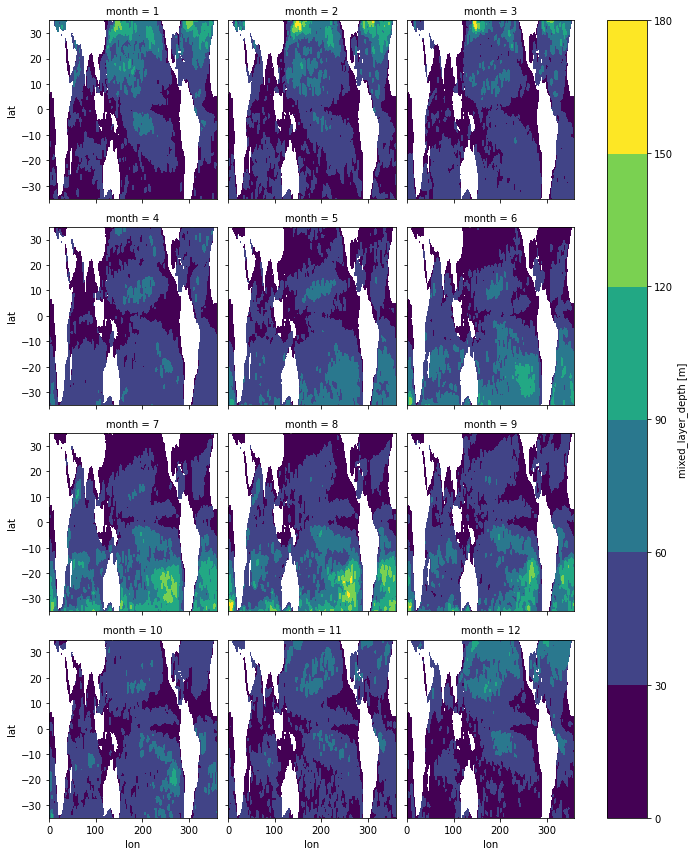

In [7]:
mld.sel(lat=slice(-35, 35)).plot.contourf(col="month", col_wrap=3);

## Save

In [8]:
mld.to_dataset().to_netcdf(mimoc_mld_file)